# Machine Learning Classification Project - Stroke Dataset
Final Project Submission

Please fill out:

Student name: Jordana Tepper, Troy Hendrickson, Viktoria Szontagh
Student pace: full time
Scheduled project review date/time:
Instructor name: Joseph Mata
Blog post URL:

In [28]:
# import 
import pandas as pd
import numpy as np

# preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('data/healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


There are 5110 indices in the dataset and 11 columns. 
Categorical columns are hypertention, heart_disease, stroke.
There are some outliers in age, as the minimum value is 0, which makes sense, as in the work_type column there are 687 children in the dataset.
The minimum glucose level was 55, much lower then the average of 106. After further investigation we assume that the low glucose level is evenly distributed about the ages, so we will assume that the glucose level is a result of fasting before the test, as they are much lower then the average 100 mg/dl.
A fasting blood sugar level of 99 mg/dL or lower is normal, 100 to 125 mg/dL indicates you have prediabetes, and 126 mg/dL or higher indicates you have diabetes.
A fasting blood sugar level of 140 mg/dL or lower is normal, 140 to 200 mg/dL indicates you have prediabetes, and 200 mg/dL or higher indicates you have diabetes. We will add a new column and categorize the data accordingly.
We will not be working with column 'id', so we will drop this from the dataset.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Based on the above summary there are missing values only in bmi column.

In [6]:
# dropping the id column
df.drop('id', axis=1, inplace=True)

In [7]:
# checking the distribution of gender
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

There is only one line were the gender is 'other'. We decided to drop this row.

In [8]:
# dropping the row with gender 'other'
df.drop(df[df.gender == 'Other'].index, inplace = True)

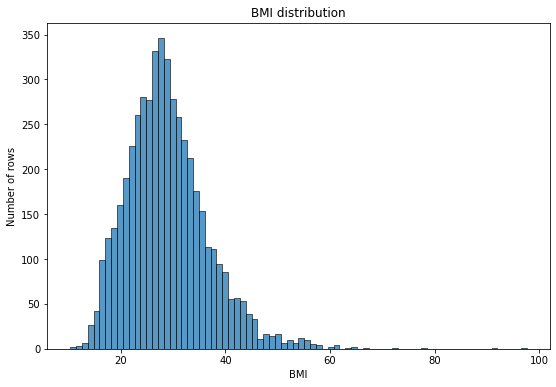

In [9]:
# distribution of the BMI column
fig ,ax = plt.subplots(figsize = (9,6))
sns.histplot(df['bmi'])
ax.set_title('BMI distribution')
ax.set_xlabel('BMI')
ax.set_ylabel('Number of rows')
plt.show()

There are 201 missing values in the bmi column, we will use the simple imputer later on to fill the missing values with median, as the bmi seems a little skewed to the right.

In [10]:
# checking the distribution of the hyperstension column
df['hypertension'].value_counts()

0    4611
1     498
Name: hypertension, dtype: int64

In [11]:
# checking the distribution of the heart disease column
df['heart_disease'].value_counts()

0    4833
1     276
Name: heart_disease, dtype: int64

In [12]:
#df.describe(include='object')

In [13]:
# distribution of ever_married column
df['ever_married'].value_counts()

Yes    3353
No     1756
Name: ever_married, dtype: int64

In [14]:
# distribution of work_type
df['work_type'].value_counts()

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [15]:
# distribution of Residence_type
df['Residence_type'].value_counts()

Urban    2596
Rural    2513
Name: Residence_type, dtype: int64

In [16]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

There are 1544 indices in the dataset where the smoking status is unkown. This need to be further investigated

In [17]:
# checking the smoking status for 'unknown' and age below 13
df[(df['smoking_status'] == 'Unknown') & (df['age'] < 13)]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
162,Female,1.32,0,0,No,children,Urban,70.37,NaN,Unknown,1
249,Male,3.00,0,0,No,children,Rural,95.12,18.0,Unknown,0
251,Female,8.00,0,0,No,Private,Urban,110.89,17.6,Unknown,0
282,Female,3.00,0,0,No,children,Urban,73.74,16.0,Unknown,0
291,Male,4.00,0,0,No,children,Rural,79.17,20.0,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
5078,Female,8.00,0,0,No,children,Urban,76.31,15.5,Unknown,0
5079,Male,1.72,0,0,No,children,Urban,77.28,17.1,Unknown,0
5089,Female,0.72,0,0,No,children,Rural,62.13,16.8,Unknown,0
5095,Male,1.08,0,0,No,children,Rural,79.15,17.4,Unknown,0


Based on the global statistic for smoking in children, we decided to change the smoking_status from unkown to never smoker for those rows the where the age is below 13 years old.

In [18]:
# reclassify those who are under 13 as never smoker
df.loc[((df['smoking_status'] == 'Unknown') & (df['age'] < 13)), 'smoking_status'] = 'never smoked'


In [19]:
df['smoking_status'].value_counts()

never smoked       2439
Unknown             997
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

In [20]:
# distribution of stroke
df['stroke'].value_counts()

0    4860
1     249
Name: stroke, dtype: int64

Most of the cases, 4861 indices, the patient had no history of stroke. 249 of the cases they had stroke before.


In [21]:
# checking the dataset for those who considered diabetic
diabetes = df.loc[df['avg_glucose_level'] > 200].sort_values(by = 'age' , ascending = True)
diabetes

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2079,Female,4.0,0,0,No,children,Rural,206.25,17.0,never smoked,0
1277,Female,6.0,0,0,No,children,Urban,201.25,NaN,never smoked,0
1512,Female,12.0,0,0,No,children,Rural,207.45,25.4,smokes,0
1841,Male,12.0,0,0,No,children,Rural,213.87,25.3,never smoked,0
3734,Female,13.0,0,0,No,children,Rural,219.81,NaN,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
187,Female,82.0,1,1,Yes,Govt_job,Urban,215.94,27.9,formerly smoked,1
4763,Male,82.0,0,0,Yes,Private,Urban,217.57,33.5,formerly smoked,0
128,Male,82.0,0,0,Yes,Govt_job,Urban,200.59,29.0,formerly smoked,1
337,Female,82.0,0,1,No,Private,Urban,215.60,24.9,never smoked,0


In [22]:
diabetes.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,434.000000,434.000000,434.000000,434.000000,391.000000,434.000000
mean,61.629032,0.241935,0.168203,221.791267,33.950384,0.129032
std,14.995401,0.428750,0.374478,15.357093,8.031326,0.335623
min,4.000000,0.000000,0.000000,200.140000,14.200000,0.000000
25%,53.000000,0.000000,0.000000,208.797500,28.150000,0.000000
50%,63.000000,0.000000,0.000000,219.600000,32.800000,0.000000
75%,74.000000,0.000000,0.000000,231.555000,38.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,71.900000,1.000000


BMI 71 seems an odd number, it either an imputation error or the person is severly obese 

In [23]:
# checking the bmi over 70
diabetes[diabetes.bmi > 70].index

Int64Index([544], dtype='int64')

In [24]:
df.drop(df[df.index == 544].index, inplace = True)
#diabetes[diabetes.index == 544]

In [25]:
# adding new column to categorize the glucose level
df.loc[df['avg_glucose_level'] < 70, 'blood_sugar_cat'] = 'hypoglycemia'
df.loc[(df['avg_glucose_level'] >= 70) & (df['avg_glucose_level'] <= 140), 'blood_sugar_cat'] = 'normal'
df.loc[(df['avg_glucose_level'] > 140) & (df['avg_glucose_level'] <= 200), 'blood_sugar_cat'] = 'pre-diabetic'
df.loc[df['avg_glucose_level'] > 200, 'blood_sugar_cat'] = 'diabetic'

In [26]:
# Simple imputer for missing bmi values, re 
df['bmi'] = SimpleImputer(missing_values=np.nan, strategy='median')

In [31]:
# train test split
X = df.drop(columns = 'stroke', axis = 1)
y = df['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.20, random_state = 42)